# Handwriting Recognition Using K-Means

This is a project from the [Codecademy](https://www.codecademy.com/learn) Data Science Career Path.

In this project I will us **K-means clustering** to cluster images of handwritten digits.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

# Import the digits dataset from sklearn
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
# Look at the data description
print(digits["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [25]:
# Look at the data and its size
# In the data, 0 is white and 16 is black, lineraly scaled between those numbers
print(digits["data"])
print(digits["data"].shape)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


So there are 1797 instances in this dataset, each with 64 features, each feature corresponding to the grayscale value of a pixel where 0 is white and 16 is black.

In [31]:
# Look at the target values and how many there are
print(digits["target"])
print(digits["target"].shape)

[0 1 2 ... 8 9 8]
(1797,)


Just to check the distribution of the targets to see how balanced the dataset is, we can convert the target array into a dataframe and utilize the `value-counts` method.

In [53]:
import pandas as pd
# Create a dataframe from the target array and perform a value countm
df = pd.DataFrame(columns=["target"], data=digits["target"])
df.value_counts(normalize=True)

target
3         0.101836
5         0.101280
1         0.101280
6         0.100723
4         0.100723
9         0.100167
7         0.099610
0         0.099054
2         0.098497
8         0.096828
dtype: float64

It appears that the dataset is quite balanced!

We can visualize what an instance of the data looks like.

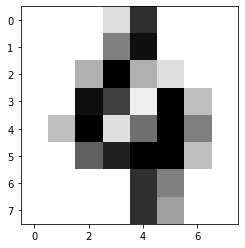

In [74]:
# Visualize the 100th image

plt.imshow(digits.images[100], cmap=plt.cm.binary, interpolation='nearest')
plt.show()

It appears to be a "4", but we can check the `target` array to be sure.

In [50]:
# Print the 100th target
digits.target[100]

4

Let's look at more of the images to get a feel for how easily identifiable we think they should be.

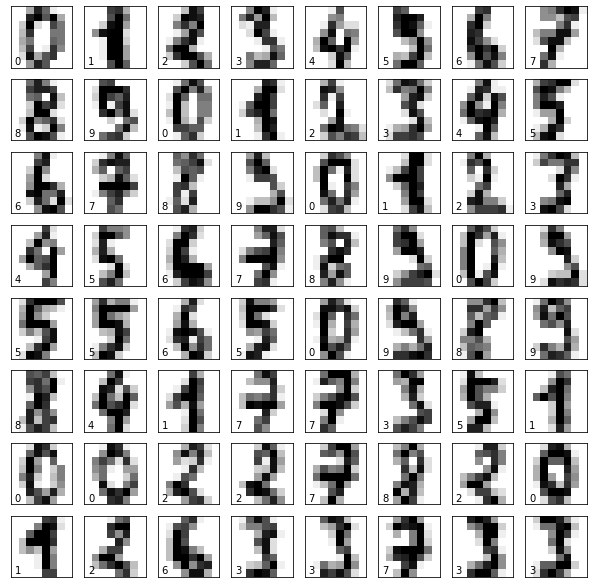

In [80]:
# Figure size (width, height)
 
fig = plt.figure(figsize=(8, 8))
 
# Adjust the subplots 

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1)
 
# For each of the 64 images
 
for i in range(64):
 
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
 
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
 
    # Display an image at the i-th position
 
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
 
    # Label the image with the target value
 
    ax.text(0, 7, str(digits.target[i]))
 
plt.show()

## Clustering

Now we can cluster the images into groups. Since we know there are 10 different digits, we will use a k value of 10.

In [82]:
from sklearn.cluster import KMeans

# Create the model with 10 clusters and fit to the data

model = KMeans(n_clusters=10, random_state=15217)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=15217)

Now we would like to visualize the clusters the model created. Visualizing a point in 64-dimensional space is not possible, but we *can* see what image a single point would produce on an 8x8 grid such as we know the data we're working with are images.

While we don't know the label of each group, we can visualize each centroid as below.

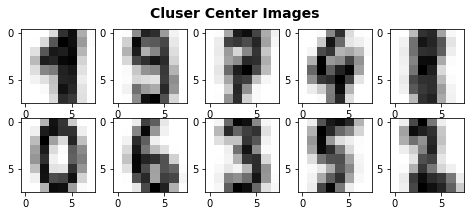

In [83]:
fig = plt.figure(figsize=(8, 3))
 
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')

for i in range(10):
 
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
 
  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show()